<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: SOBIA ALAMGIR</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/sobiahashmi) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.linkedin.com/in/sobia-alamgir-a027b939/) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/sobia-alamgir-a027b939/)



<!-- [![Streamlit](https://img.shields.io/badge/Streamlit-Open%20App-FF4B4B?style=for-the-badge&logo=streamlit&logoColor=white)](https://predict-podcast-listening-time-fgkp77kmvwwpruyistfzhj.streamlit.app/) -->

<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">Predict Calorie Expanditure</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>

# Step-01 Load Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#!pip install catboost

# Step-02 Load Dataset

In [9]:
df_train = pd.read_csv('train.csv')
display(df_train.head())
print("Training Dataset: ")
print("Rows:",df_train.shape[0],", Columns: ", df_train.shape[1])

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


Training Dataset: 
Rows: 750000 , Columns:  9


In [12]:
df_test = pd.read_csv('test.csv')
display(df_test.head())
print("Testing Dataset: ")
print("Rows:",df_test.shape[0],", Columns: ", df_test.shape[1])

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


Testing Dataset: 
Rows: 250000 , Columns:  8


# Step-03 Data Preprocessing

#### Information About Data

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4   Weight      250000 non-null  float64
 5   Duration    250000 non-null  float64
 6   Heart_Rate  250000 non-null  float64
 7   Body_Temp   250000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4   Weight      250000 non-null  float64
 5   Duration    250000 non-null  float64
 6   Heart_Rate  250000 non-null  float64
 7   Body_Temp   250000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 15.3+ MB


#### Check Null values

In [20]:
df_train.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [21]:
df_test.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

* **Let's apply One Hot Encoding on Sex in both Training and Testing data**

In [23]:
df_train = pd.get_dummies(df_train, columns=['Sex'])
df_test = pd.get_dummies(df_test, columns=['Sex'])

In [24]:
df_train.head()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Sex_female,Sex_male
0,750000,45,177.0,81.0,7.0,87.0,39.8,False,True
1,750001,26,200.0,97.0,20.0,101.0,40.5,False,True
2,750002,29,188.0,85.0,16.0,102.0,40.4,True,False
3,750003,39,172.0,73.0,20.0,107.0,40.6,True,False
4,750004,30,173.0,67.0,16.0,94.0,40.5,True,False


In [25]:
df_test.head()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Sex_female,Sex_male
0,750000,45,177.0,81.0,7.0,87.0,39.8,False,True
1,750001,26,200.0,97.0,20.0,101.0,40.5,False,True
2,750002,29,188.0,85.0,16.0,102.0,40.4,True,False
3,750003,39,172.0,73.0,20.0,107.0,40.6,True,False
4,750004,30,173.0,67.0,16.0,94.0,40.5,True,False


#### Correlation Matrix

* **Let's check correlation among all features in Training Dataset**

In [28]:
df_train.corr().style.background_gradient(cmap='coolwarm', axis=None)

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Sex_female,Sex_male
id,1.000000,0.001375,-0.000438,-0.000248,0.000618,-0.000930,-0.000007,0.000767,-0.000767
Age,0.001375,1.000000,0.012705,0.074219,0.016267,0.017267,0.031114,-0.008292,0.008292
Height,-0.000438,0.012705,1.000000,0.957844,-0.028887,-0.014513,-0.033645,-0.755415,0.755415
Weight,-0.000248,0.074219,0.957844,1.000000,-0.020479,-0.004230,-0.023704,-0.817693,0.817693
Duration,0.000618,0.016267,-0.028887,-0.020479,1.000000,0.875267,0.902594,0.010412,-0.010412
Heart_Rate,-0.000930,0.017267,-0.014513,-0.004230,0.875267,1.000000,0.794969,-0.006762,0.006762
Body_Temp,-0.000007,0.031114,-0.033645,-0.023704,0.902594,0.794969,1.000000,0.017314,-0.017314
Sex_female,0.000767,-0.008292,-0.755415,-0.817693,0.010412,-0.006762,0.017314,1.000000,-1.000000
Sex_male,-0.000767,0.008292,0.755415,0.817693,-0.010412,0.006762,-0.017314,-1.000000,1.000000


#### Check Outliers

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Age         250000 non-null  int64  
 2   Height      250000 non-null  float64
 3   Weight      250000 non-null  float64
 4   Duration    250000 non-null  float64
 5   Heart_Rate  250000 non-null  float64
 6   Body_Temp   250000 non-null  float64
 7   Sex_female  250000 non-null  bool   
 8   Sex_male    250000 non-null  bool   
dtypes: bool(2), float64(5), int64(2)
memory usage: 13.8 MB


* **Let's check outliers in Training Dataset**

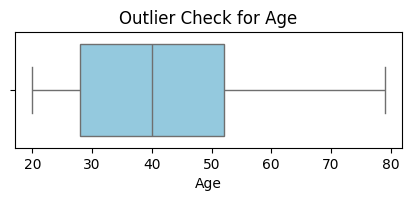

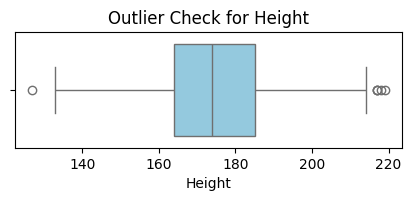

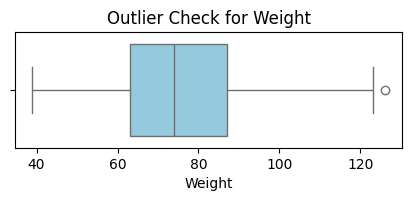

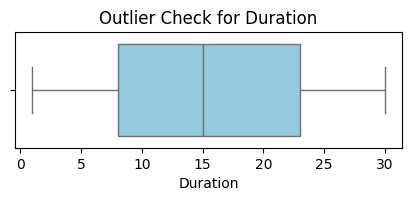

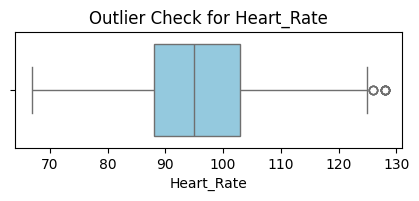

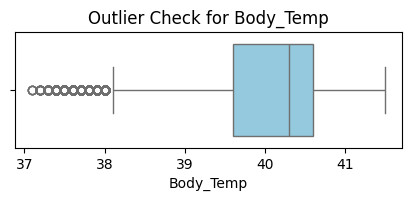

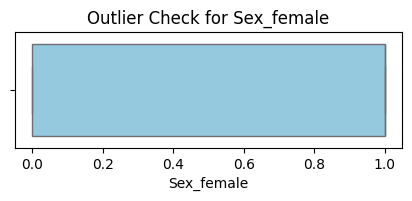

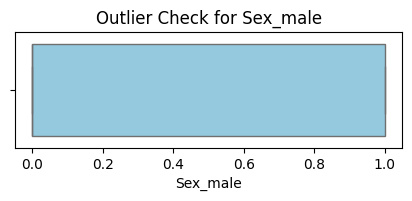

In [33]:
Numeric_features = ['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Sex_female','Sex_male']
for col in Numeric_features:
    plt.figure(figsize=(5, 1.5))
    sns.boxplot(x=df_train[col], color='skyblue')
    plt.title(f'Outlier Check for {col}')
    plt.show()

* **Let's check outliers in Testing Dataset**

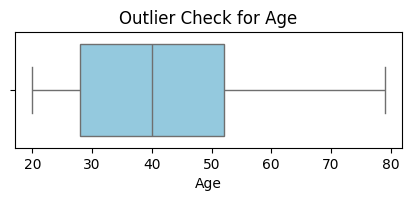

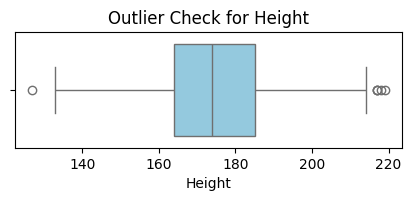

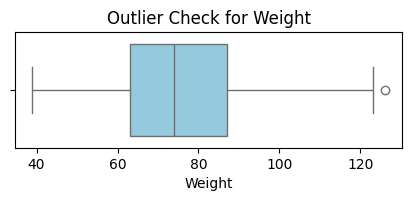

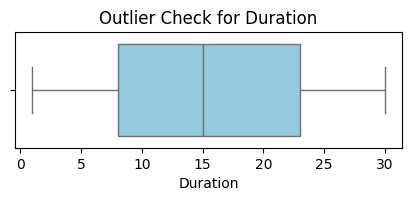

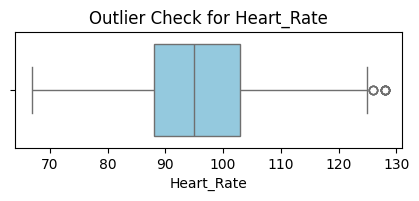

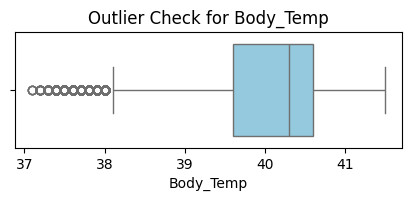

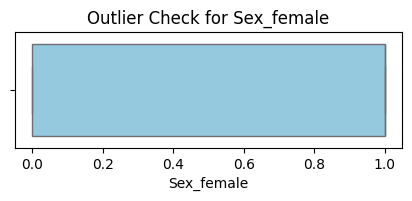

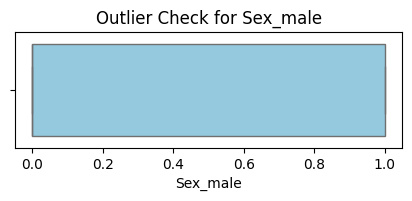

In [34]:
Numeric_features = ['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Sex_female','Sex_male']
for col in Numeric_features:
    plt.figure(figsize=(5, 1.5))
    sns.boxplot(x=df_test[col], color='skyblue')
    plt.title(f'Outlier Check for {col}')
    plt.show()

#### Remove Outliers using IQR - Inter Quartile Range

* **Lets Apply Outliers Tectnique in Training Dataset**

In [35]:
outlier_cols = ['Height', 'Weight','Heart_Rate','Body_Temp']
df_train_clean = df_train.copy()
for col in outlier_cols:
    Q1 = df_train_clean[col].quantile(0.25)
    Q3 = df_train_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_train_clean = df_train_clean[(df_train_clean[col] >= lower) & (df_train_clean[col] <= upper)]


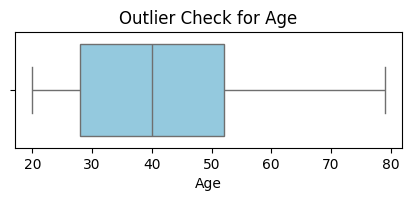

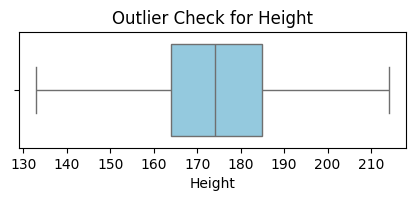

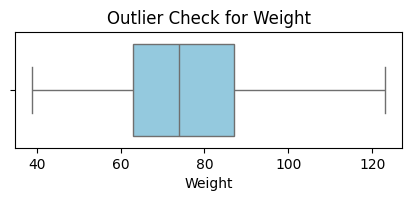

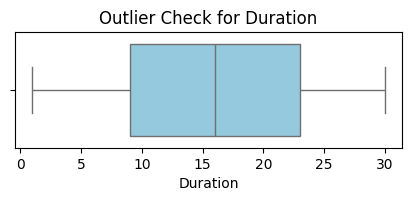

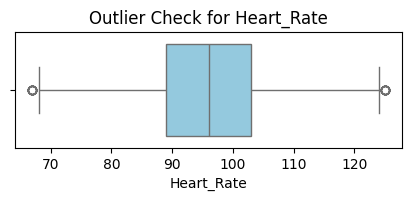

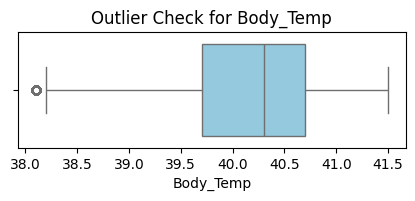

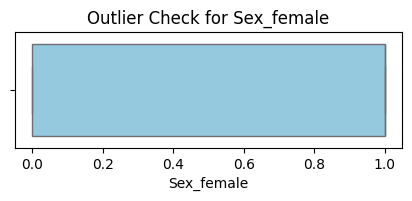

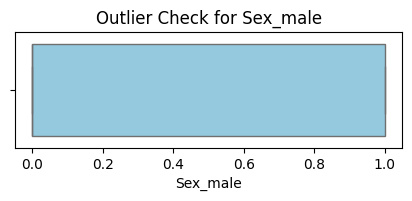

In [36]:
Numeric_features = ['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Sex_female','Sex_male']
for col in Numeric_features:
    plt.figure(figsize=(5, 1.5))
    sns.boxplot(x=df_train_clean[col], color='skyblue')
    plt.title(f'Outlier Check for {col}')
    plt.show()

* **Let's Apply Outliers in Testing Dataset**

In [37]:
outlier_cols = ['Height', 'Weight','Heart_Rate','Body_Temp']
df_test_clean = df_test.copy()
for col in outlier_cols:
    Q1 = df_test_clean[col].quantile(0.25)
    Q3 = df_test_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_test_clean = df_test_clean[(df_test_clean[col] >= lower) & (df_test_clean[col] <= upper)]


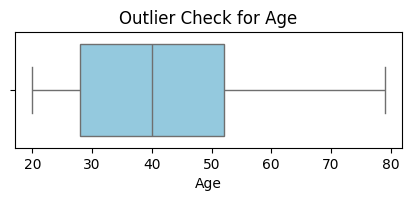

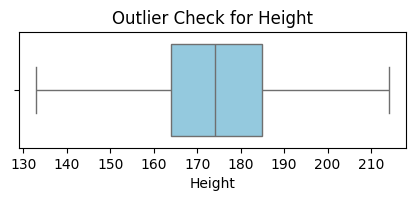

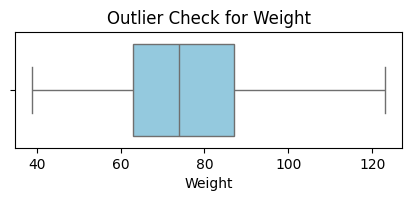

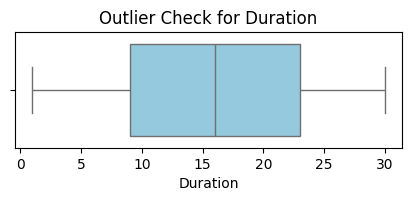

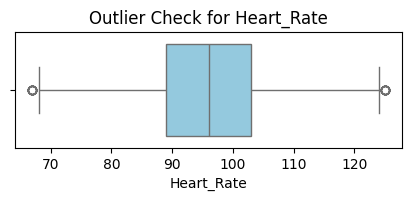

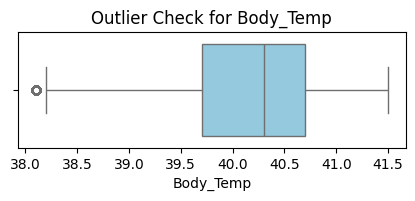

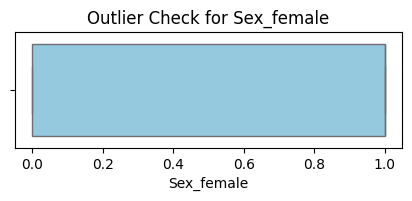

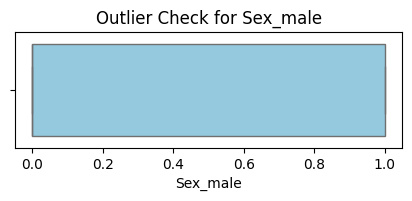

In [38]:
Numeric_features = ['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Sex_female','Sex_male']
for col in Numeric_features:
    plt.figure(figsize=(5, 1.5))
    sns.boxplot(x=df_test_clean[col], color='skyblue')
    plt.title(f'Outlier Check for {col}')
    plt.show()

<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">THANK YOU</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>